## FFR120
# Felix Waldschock 2023

## Exercise 2.2 Ising model on a 2D lattice  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
#cmapStyle = "seismic"
cmapStyle = 'binary'

In [2]:
N = 200     # number of spins
J = 1       # ferromagnetic material
H = 0       # external magnetic field
Tc = 2.269  # critical temperature
T = 5       # simulation temparture
kB = 1
beta = 1 / T

In [3]:
def initGrid(N):
    grid = np.random.choice([-1,1], size=(N, N), p=[0.5,0.5])
    return grid

In [4]:
# define update function
def update(grid, percetance, beta, H):
    updated_grid = grid.copy()
    percetance = percetance / 100
    N = updated_grid.shape[0]

    lenX = int(N * percetance)
    lenY = int(N * percetance)

    # create some random coordinates -> exclude the edges
    x_rand = np.random.randint(0, N, size=lenX * lenY)
    y_rand = np.random.randint(0, N, size=lenY * lenX)

    # create a position array with [x,y] coordinates
    pos = np.stack((x_rand,y_rand), axis=0)
    # loop over all random coordinates
    for i in range(pos.shape[1]):
        x = pos[0,i]
        y = pos[1,i]

        # neighbour coordinates
        x_m = x-1
        x_p = x+1
        y_m = y-1
        y_p = y+1

        # periodic boundary conditions with modulo N
        x_m = x_m % N
        x_p = x_p % N
        y_m = y_m % N
        y_p = y_p % N

        # sum the neighbours
        tmp1 = updated_grid[x_m,y]
        tmp2 = updated_grid[x_p,y]
        tmp3 = updated_grid[x,y_m]
        tmp4 = updated_grid[x,y_p]
        M = tmp1 + tmp2 + tmp3 + tmp4

        # calulate the energies of the possible futures states
        E_plus = -(H + J*M) # spin up
        E_minus = H + J*M   # spin down

        # calculate the probability of the spin flip
        p_up = np.exp(-beta * E_plus) / (np.exp(-beta * E_plus) + np.exp(-beta * E_minus))
        # p_down = np.exp(-beta * E_minus) / (np.exp(-beta * E_plus) + np.exp(-beta * E_minus))

        # flip the spin if the probability is higher than a random number
        if np.random.random() < p_up:
            updated_grid[x,y] = 1
            # np.random.random() < p_down:
        else:
            updated_grid[x,y] = -1

    return updated_grid

In [5]:
# init the grid with equal probability [-1, +1] spins
grid = initGrid(N)
init_grid = grid


20546


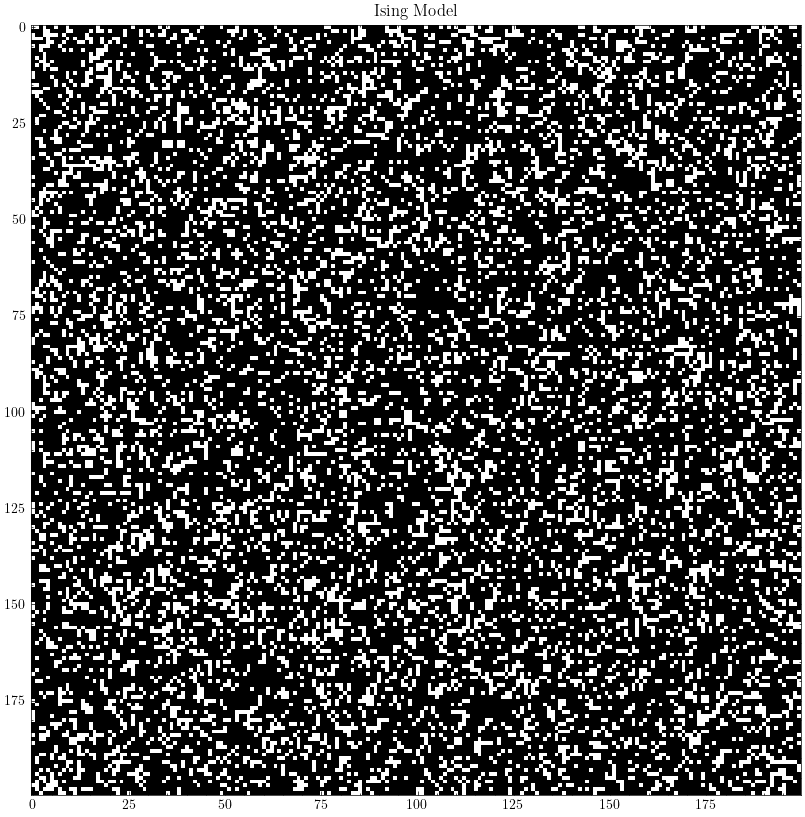

In [6]:
newGrid = grid.copy()
T = 5
H = 5

# run for several iterations
for i in range(100):
    newGrid = update(newGrid, 10, beta, H)

# plot the results
plt.figure(figsize=(10,10))
plt.imshow(newGrid, cmap=cmapStyle)
plt.title('Ising Model')

sum = np.sum(newGrid)
print(sum)

In [7]:
def updateGridEpochs(grid, epochs, percentage, beta, H):
    storeEpochs = []
    for i in range(epochs[-1]):
        # if i in epochs: store the grid
        if i in epochs:
            storeEpochs.append(grid.copy())
        grid = update(grid, percentage, beta, H)
    storeEpochs.append(grid.copy())
    return storeEpochs

In [8]:
if(1):
    ## Calculate the new grids with different temperatures and various iterations
    # repeat for different Temperatures, and with H = 0
    
    Iterations = [0,100,10000, 100000]
    #Iterations = [0,10,100, 10000]
    H = 0
    T = [1, 2.269, 5]
    NumberOfTemperatures = len(T)
    N = 200
    betaList = 1 / np.array(T)

    # init 2d array to store the grids for each temperature and 4 different iterations
    gridArray = np.zeros((NumberOfTemperatures, 4, N, N))

    for i in range(NumberOfTemperatures):
        # init the grid with equal probability [-1, +1] spins
        grid = np.random.choice([-1, 1], size=(N, N))
        init_grid = grid.copy()
        beta = betaList[i]
        
        # update the grid for each iteration
        updatedGrids = updateGridEpochs(grid, Iterations, 10, beta, H)
        # store the grids
        for j in range(len(updatedGrids)):
            gridArray[i,j,:,:] = updatedGrids[j]


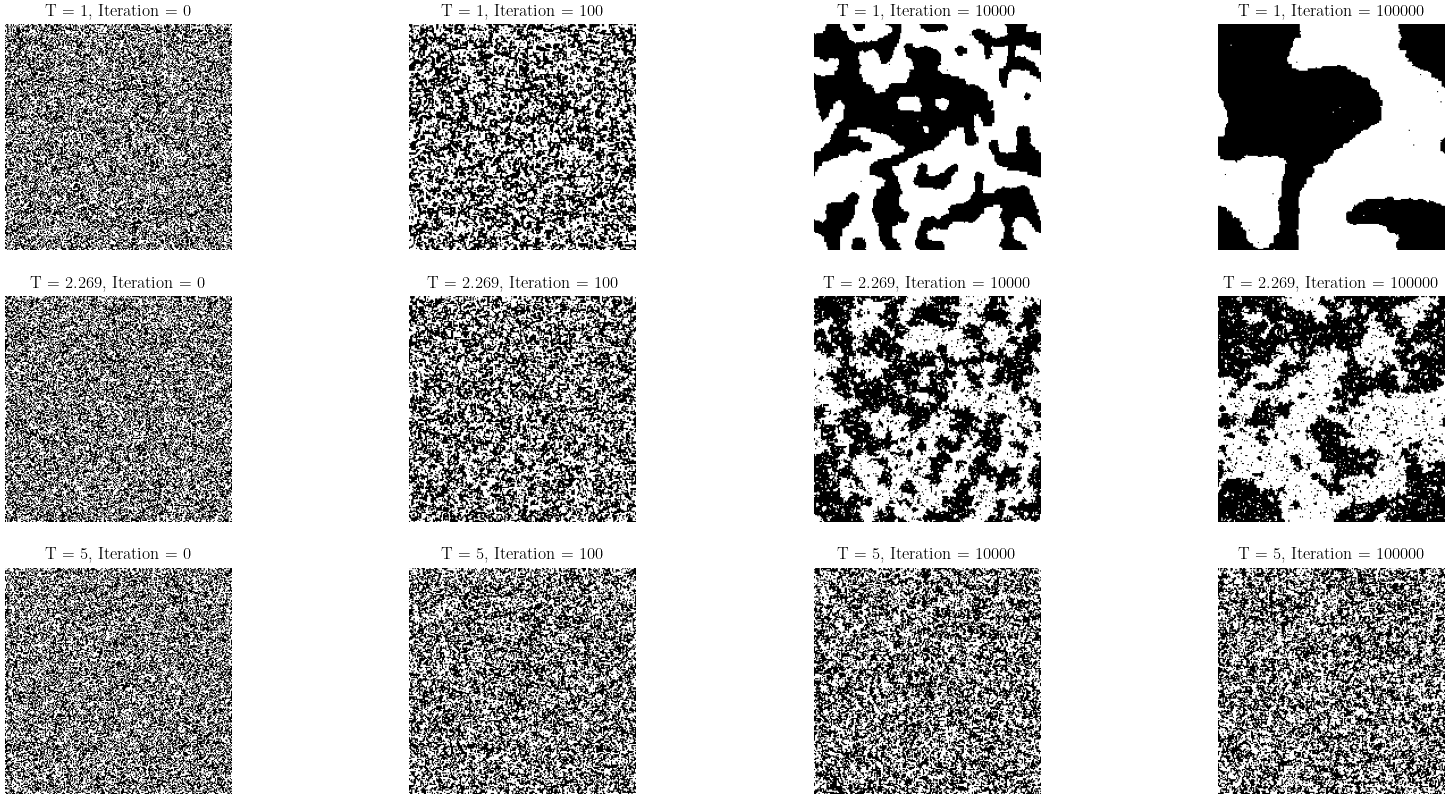

In [9]:
if(1):
    # create a subplot with 2 rows and 5 columns
    fig, axs = plt.subplots(3,4, figsize=(20, 10))

    # plot all the grids from gridArray
    for i in range(NumberOfTemperatures):
        for j in range(len(Iterations)):
            axs[i,j].imshow(gridArray[i,j,:,:], cmap=cmapStyle)
            axs[i,j].set_title("T = " + str(T[i]) + ", Iteration = " + str(Iterations[j]))
            axs[i,j].axis('off')

# C
This means that the average magnetization will be close to zero or very small, indicating that there is no long-range order in the spins. In a paramagnetic material, spins are randomly oriented and do not show any net magnetic moment.

to do so set
$ H \neq 0$ 
$T > 5$

Energy:  0.75545


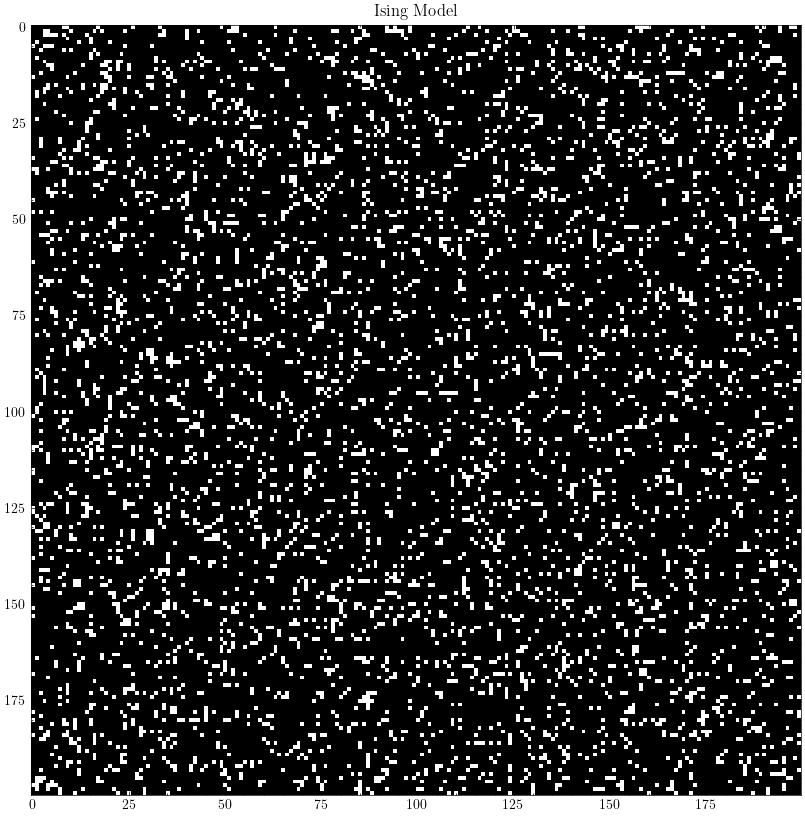

In [10]:
N = 200 # number of spins
J = 1 # feerromagnetic material
H = 5 # external magnetic field
T = 5
kB = 1
beta = 1 / T
percentage = 10

grid = initGrid(N)
updatedGrid = grid

# run for several iterations
for i in range(100):
    newGrid = update(newGrid, 10, beta, H)

# plot the results
plt.figure(figsize=(10,10))
plt.imshow(newGrid, cmap=cmapStyle)
plt.title('Ising Model')

energy = np.sum(newGrid) / (N*N)

print("Energy: ", energy)


It can be seen, that the distribution of the spins is not equal anymore. This is due to the field that affects them.

# D
Calculate the total magnetiation of this system as a function of H
$m = \frac{1}{N^2}\sum_{i,j}\sigma_{i,j}$

In [11]:
if (1):
    H_ = np.linspace(-5,5, 50)
    m_h = np.zeros(len(H_))

    for i in range(len(H_)):
        H = H_[i]
        grid = initGrid(N)
        updatedGrid = grid
        for j in range(1000):
            updatedGrid = update(grid, percentage, beta, H)
        m_h[i] = np.sum(updatedGrid) / (N*N)



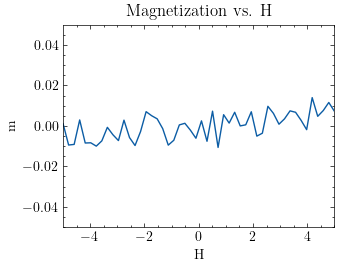

In [13]:
plt.plot(H_, m_h)
plt.xlim(-5,5)
plt.ylim(-0.05,0.05)
plt.xlabel("H")
plt.ylabel("m")
plt.title("Magnetization vs. H")
plt.show()